### Marco Aurélio Soares Abrantes - es98887  
### Lucas Braga Moura - es98909

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Carregando e exibindo o head do dataset de treino

In [2]:
train_dataset = pd.read_csv('train.csv', index_col=0)
train_dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [3]:
train_dataset.describe()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,1.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Carregando e exibindo o head do dataset de teste

In [4]:
test_dataset = pd.read_csv('test.csv')
test_dataset.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
test_dataset.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


Gerando dataframe de resposta com a variável 'NU_INSCRICAO'


In [6]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test_dataset['NU_INSCRICAO']
answer.head()

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934


###Testando hipóteses para selecionar features

Primeira hipótese: NU_IDADE, TP_COR_RACA e IN_TREINEIRO são fracamente correlacionados com outras características.

In [7]:
var = ['TP_COR_RACA','NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
train_dataset[var].corr()

,TP_COR_RACA,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
TP_COR_RACA,1.000000,0.009675,0.009676,-0.149429,-0.161831,-0.168624,-0.107840
NU_IDADE,0.009675,1.000000,-0.295091,-0.056171,-0.001611,-0.024979,-0.116125
IN_TREINEIRO,0.009676,-0.295091,1.000000,-0.037874,-0.053460,-0.028261,-0.026328
NU_NOTA_CN,-0.149429,-0.056171,-0.037874,1.000000,0.609543,0.545667,0.459938
NU_NOTA_CH,-0.161831,-0.001611,-0.053460,0.609543,1.000000,0.692988,0.550582
NU_NOTA_LC,-0.168624,-0.024979,-0.028261,0.545667,0.692988,1.000000,0.512908
NU_NOTA_REDACAO,-0.107840,-0.116125,-0.026328,0.459938,0.550582,0.512908,1.000000


Segunda hipótese: NU_IDADE, TP_COR_RACA e IN_TREINEIRO poderiam ser descartados, evitando interferências nas previsões do modelo.

In [8]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

In [9]:
train_dataset[features].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.609543,0.545667,0.459938
NU_NOTA_CH,0.609543,1.000000,0.692988,0.550582
NU_NOTA_LC,0.545667,0.692988,1.000000,0.512908
NU_NOTA_REDACAO,0.459938,0.550582,0.512908,1.000000


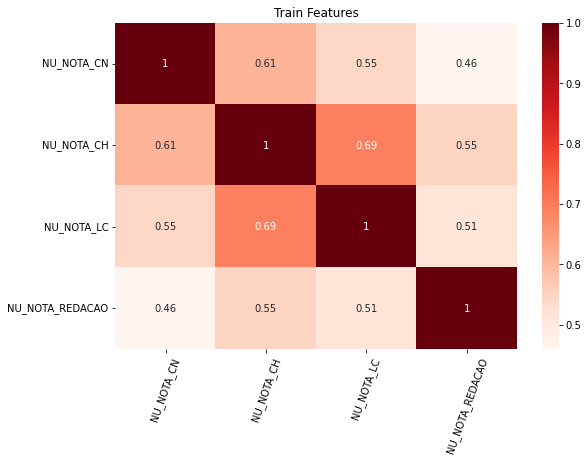

In [10]:
plt.figure(figsize=(9,6))
plt.title('Train Features')
sns.heatmap(train_dataset[features].corr(), annot=True, cmap='Reds')
plt.xticks(rotation=70)
plt.show()

In [11]:
test_dataset[features].corr()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,0.442692,0.537141,0.495745,1.000000


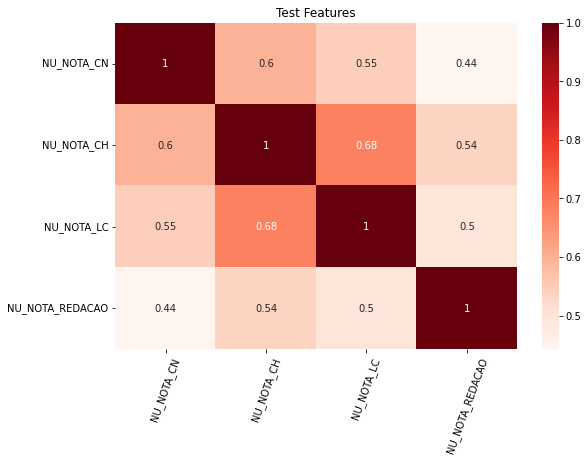

In [12]:
plt.figure(figsize=(9,6))
plt.title('Test Features')
sns.heatmap(test_dataset[features].corr(), annot=True, cmap='Reds')
plt.xticks(rotation=70)
plt.show()

#### Pré-processamento de dados
Como existem dados nulos no conjunto de dados, há algumas abordagens que podem ser adotadas:

1) Elimine valores nulos do conjunto de dados. Poderia diminuir drasticamente as amostras para treinar o modelo;

2) Preencha os valores nulos com zeros. Ele mantém o número de amostras no conjunto de dados.

3) Preencha os valores nulos com o valor médio das feições. Ele mantém o número de amostras no conjunto de dados.

Aqui, os valores nulos serão preenchidos com zeros (segunda abordagem).

In [13]:
train_dataset[features].isnull().sum() 

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
dtype: int64

In [14]:
train_dataset['NU_NOTA_MT'].isnull().sum()

3597

In [15]:
test_dataset[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

Preenchendo valores nulos com zero

In [16]:
train_dataset['NU_NOTA_CN'].fillna(0, inplace=True)
train_dataset['NU_NOTA_CH'].fillna(0, inplace=True)
train_dataset['NU_NOTA_REDACAO'].fillna(0, inplace=True)
train_dataset['NU_NOTA_LC'].fillna(0, inplace=True)
train_dataset['NU_NOTA_MT'].fillna(0, inplace=True)
test_dataset['NU_NOTA_CN'].fillna(0, inplace=True)
test_dataset['NU_NOTA_CH'].fillna(0, inplace=True)
test_dataset['NU_NOTA_REDACAO'].fillna(0, inplace=True)
test_dataset['NU_NOTA_LC'].fillna(0, inplace=True)

Confirmando se valores nulos estão zerados

In [17]:
train_dataset[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [18]:
train_dataset['NU_NOTA_MT'].isnull().sum()

0

In [19]:
test_dataset[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

Dividindo o dataset


In [20]:
X = train_dataset[features]

X.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
1,436.3,495.4,581.2,520.0
2,474.5,544.1,599.0,580.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0


In [21]:
y = train_dataset['NU_NOTA_MT']
y.head()

1    399.4
2    459.8
3      0.0
4      0.0
5      0.0
Name: NU_NOTA_MT, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Normalização de escala de recursos

Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos.

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

#### Modelando
Regressão Linear

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Obtendo previsões

In [25]:
y_pred = lr.predict(X_test)

O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória  
Para evitar que fique enviesado

In [26]:
r2_score(y_test, y_pred)

0.9040921417473636

Realizando pesquisa de grade  
A pesquisa de grade é um método para encontrar a melhor combinação possível de hiperparâmetros nos quais o modelo atinge a maior precisão  
Usado para melhorar a tecnica que o randomForest usa, ao invés de mostrar aleatóriamente a distribuição, ele avalia todas avaliações que foram definidas (as features)

#### Parametros usados GridSearch CV
**estimator:** ajusta o conjunto de dados de todas combinações possíveis, dados os valores dos parâmetros que serão avaliados, a melhor combinação é mantida. O RandomForestRegressor() retorna um caminho de decisão (uma matriz) depois de analisar os parâmetros passados pra ele  
**param_grid:**  
  'max_depth': quantidade de camadas [3,7)  
  'n_estimators': O parâmetro especifica o número de árvores na floresta do modelo  
**cv:** Determina a estratégia de divisão de validação cruzada, inteiro, para especificar o número de folds em um (Stratified)KFold  
**scoring:**R² explicado acima  
**verbose:**0 para não ficar verboso  
**n_jobs:**O número de trabalhos paralelos a serem executados para pesquisa de vizinhos. -1 significa usar todos os processadores

best_result pega pega os melhores resultados de x e y do gridsearch, depois do treinamento



#### Parametros do RandomForestRegressor
pega o max_depth e n_estimators dos melhores parâmetros obtidos

In [27]:
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': range(3,7), 
                'n_estimators': (50, 100, 500, 1000),
    },
    cv=10, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            random_state=False, verbose=False)

K-fold é o método de cross-validation mais conhecido e utilizado. O método consiste em dividir o dataset em k partes, usando k-1 partes para treino e a parte remanescente para teste, fazendo isso k vezes. Em cada uma das k vezes, testa-se o modelo com um fold diferente calculando a métrica escolhida para avaliação do modelo. Ao final do processo, teremos k medidas da métrica de avaliação escolhida, com as quais geralmente calculamos a média e o desvio-padrão

In [28]:
scores = cross_val_score(rfr, X, y, cv=10, scoring='r2')
scores

array([0.92464005, 0.92680538, 0.91812088, 0.92461308, 0.91545409,
       0.91877386, 0.9268147 , 0.92682343, 0.92226888, 0.91707116])

In [29]:
scores.mean() * 100


92.2138549986639

Fazendo o modelo de Random Forest

In [30]:
rfr.fit(train_dataset[features], train_dataset['NU_NOTA_MT'])


RandomForestRegressor(max_depth=6, random_state=False, verbose=False)

Fazendo a Previsão do modelo no dataset de teste

In [31]:
y_pred = rfr.predict(test_dataset[features])
y_pred

array([431.96329071, 453.02321821, 594.88661808, ..., 679.24785386,
       450.97138894,   0.        ])

Fazendo a tabela 'NU_NOTA_MT' no dataframe de resposta e removendo nota 0 para fins de amostra dos resultados

In [32]:
answer['NU_NOTA_MT'] = y_pred
answer.mask(answer==0).ffill()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,431.963291
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,453.023218
2,b38a03232f43b11c9d0788abaf060f7366053b6d,594.886618
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,594.886618
4,715494628a50142ce8cb17191cfe6d0f3cae0934,533.348026
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,453.977916
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,471.692632
4573,655fa6306720ff16e825903b5422a46608a77545,679.247854
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,450.971389


In [33]:
answer.describe()

,NU_NOTA_MT
count,4576.000000
mean,355.425459
std,219.285955
min,0.000000
25%,0.000000
50%,444.447913
75%,483.013511
max,847.052134
